In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn joblib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Freddy-Apaka/Finance_Prefiction_model/refs/heads/ml-deployment/loan.csv")

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [6]:
%whos

Variable       Type         Data/Info
-------------------------------------
LabelEncoder   type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
df             DataFrame            customer_id     l<...>n[5000 rows x 17 columns]
np             module       <module 'numpy' from '/Li<...>kages/numpy/__init__.py'>
pd             module       <module 'pandas' from '/L<...>ages/pandas/__init__.py'>


In [7]:
# dropping null value & creating a copy of the dataframe

df.dropna()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23-01-2022,11-02-2022,14-02-2022,13-06-2022,False
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12-05-2018,17-05-2018,27-05-2018,20-11-2018,False
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14-10-2022,29-10-2022,06-11-2022,08-04-2023,True
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21-07-2018,06-08-2018,20-08-2018,21-01-2019,False


In [8]:
#encoding the default_status column

encoder = LabelEncoder()
#df["marital_status_encoded"] = encoder.fit_transform(df["marital_status"])
df["employment_type_encoded"] = encoder.fit_transform(df["employment_type"])
#df["loan_type_encoded"] = encoder.fit_transform(df["loan_type"])
df["income_level_encoded"] = encoder.fit_transform(df["income_level"])

In [9]:
# dropping all non numerical data 

columns_to_drop = ['customer_id','loan_id','loan_type','income_level','employment_type','gender','marital_status','education_level','application_date','approval_date','disbursement_date','due_date','loan_term', ]
df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
df.head()

,loan_amount,interest_rate,credit_score,default_status,employment_type_encoded,income_level_encoded
0,16795,0.051852,833,False,2,2
1,1860,0.089296,776,False,0,2
2,77820,0.070470,697,False,0,1
3,55886,0.062155,795,False,0,1
4,7265,0.070635,519,False,1,1


In [11]:
df.describe()

,loan_amount,interest_rate,credit_score,employment_type_encoded,income_level_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,573.206000,1.002000,1.011400
std,28721.249529,0.015230,158.647522,0.815922,0.810803
min,1055.000000,0.031685,300.000000,0.000000,0.000000
25%,24953.500000,0.069240,435.000000,0.000000,0.000000
50%,49730.000000,0.079533,571.000000,1.000000,1.000000
75%,75083.500000,0.089984,712.000000,2.000000,2.000000
max,99989.000000,0.138894,849.000000,2.000000,2.000000


In [12]:
# Separeting the Default_status for Over sampling 
false_values = df[df['default_status']==False]
true_values = df[df['default_status']==True]

# Creating a variable with the same lenght as the over sampled
over_true_values = len(false_values)

In [13]:
# Over sampling the minority sample
over_sample_true_values = true_values.sample(over_true_values, random_state=42,replace=True)

# Joining the two sets in the DataFrame
df2 = pd.concat([over_sample_true_values,false_values], axis=0)

#Shape of each dataset
print('Shape of Combined dataset:', df2.shape)
print('Shape of Over Sample True Default Status:',over_sample_true_values.shape)
print('Shape of False Default Status:',false_values.shape)

Shape of Combined dataset: (8002, 6)
Shape of Over Sample True Default Status: (4001, 6)
Shape of False Default Status: (4001, 6)


In [14]:
df2.head()

,loan_amount,interest_rate,credit_score,default_status,employment_type_encoded,income_level_encoded
481,17964,0.082105,397,True,0,1
2128,2058,0.103890,448,True,0,0
4244,25820,0.116618,397,True,2,1
1246,71835,0.096363,514,True,2,1
497,96981,0.088753,550,True,0,1


In [15]:
# splitting the dataframe into x & y for prediction

X = df2.drop("default_status", axis=1)
y = df2["default_status"]

In [16]:
# spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error, classification_report, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# training the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# trying to use Decision Tree for my modeling Prediction 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

print("\nClassification Report:\n",classification_report(y_test,y_pred))

NameError: name 'x_test' is not defined

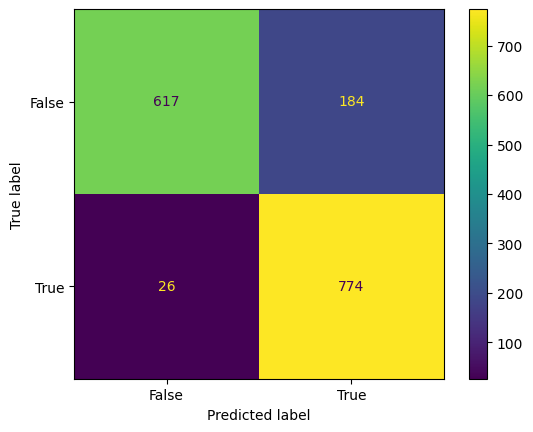

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# calculating the root mean squared error - Decision tree
mse = mean_squared_error(y_test,y_pred)
print(f"The Mean Squared Error is: {mse}")

#calculation the R squared score
r2 = r2_score(y_test,y_pred)
print(f"The R Square Score is: {r2}")

The Mean Squared Error is: 0.1311680199875078
The R Square Score is: 0.4753277153558052


# GRAPHS

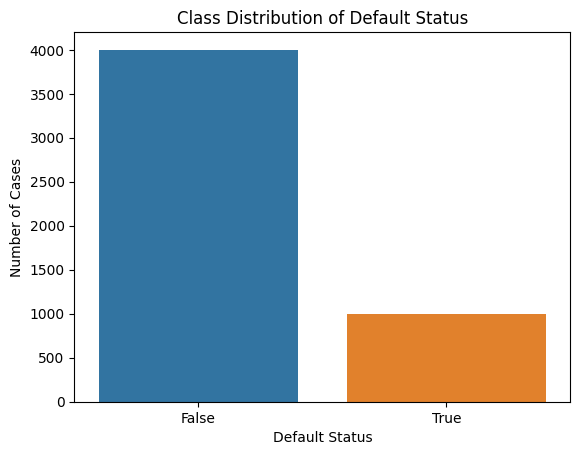

In [ ]:
# Plotting class distribution for imbalanced data
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df['default_status'].value_counts()
colors = ['#1f77b4', '#ff7f0e']

# Plot the bar graph
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, hue=class_counts.index.astype(str), palette=colors,legend=False)
plt.xlabel('Default Status')
plt.ylabel('Number of Cases')
plt.title('Class Distribution of Default Status')
plt.show()

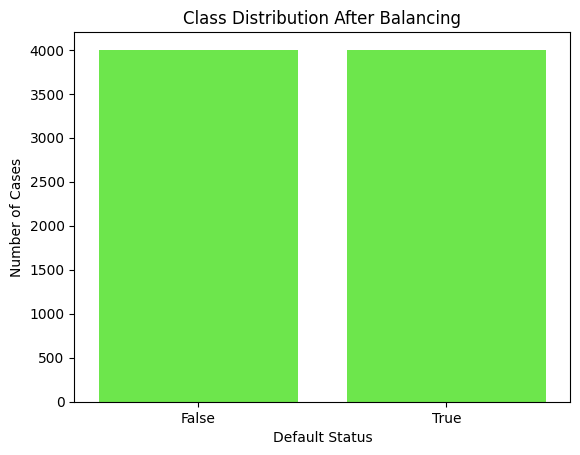

In [ ]:
sns.countplot(x=y,color='#5eff33')
plt.title("Class Distribution After Balancing")
plt.xlabel("Default Status")
plt.ylabel("Number of Cases")
plt.show()

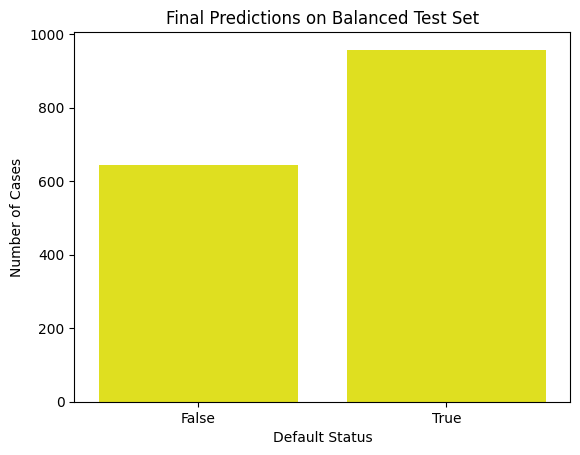

In [ ]:
sns.countplot(x=y_pred, color='#ffff00')
plt.title("Final Predictions on Balanced Test Set")
plt.xlabel("Default Status")
plt.ylabel("Number of Cases")
plt.show()

In [ ]:
from joblib import dump

In [ ]:
# model is your trained estimator
dump(model,'model/model.pkl')

['model/model.pkl']